MATH-F-314, partie analyse numérique : travail numéro 2

Danneau Florian & Maxime Garnier

$$
\begin{align}
(1) \nabla \times \vec{\mathbf{E}}\  = -\,\frac{\partial\vec{\mathbf{B}}}{\partial t}  \\ 
(2) \nabla \times \vec{\mathbf{B}} \  = \mu\ \vec{\mathbf{J}} \\   
(3) \nabla \cdot \vec{\mathbf{B}}\  = 0 \\ 
(4) \vec{\mathbf{J}}\ = \sigma\ \vec{\mathbf{E}}\\ 
\end{align}
$$

Ces 4 équations vont nous permettre de montrer que le champ magnétique B obéit bien à une loi de diffusion.
Càd que B doit obéir à :
$$
\begin{equation}
  \alpha \Delta \vec{\mathbf{B}} \  = \frac{\partial\vec{\mathbf{B}}}{\partial t} \\ 
\end{equation}
$$
où $\alpha$ est un coefficient quelconque 

On sait que par identité vectorielle, on a :
$$ \nabla \times (\nabla \times \vec{\bf V}) = \nabla (\nabla \cdot \vec{\bf V}) -\ \Delta \vec{\bf V} $$
Ce qui appliqué à notre équation (2) donnne :
$$ \text{(2)} = \nabla (\nabla \cdot \vec{\bf B}) -\ \Delta \vec{\bf B} $$
En utilisant (3), on trouve que :
$$ \Delta \vec{\bf B} = -\ \mu \nabla \times \vec{\bf J} $$
Or $ \vec{\bf J} $ est régit par l'équation (4) et en utilisant (1), on obtient :
$$ \Delta \vec{\bf B} = -\ \mu \sigma \nabla \vec{\bf E} = \mu \sigma \partial_t \vec{\bf B} $$
En réarrangeant les termes, on obtient notre équation de diffusion :
$$  \partial_t \vec{\bf B} = \frac{1}{\mu \sigma} \Delta \vec{\bf B} $$
et donc notre $\alpha$ est égal à $\frac{1}{\mu \sigma}$

Maintenant, il faut trouver les conditions aux bords du conducteur et du supraconducteur.

Pour le conducteur :
On sait que $ \vec{\bf B} $ une composante seulement en $ \vec{\bf u}_z $ par la symétrie du problème. De plus, heuristiquement, on trouve que son sens est négatif en appliquant la règle de la main droite à notre "boucle" de courant carré.

Passons au calcul. En utilisant les relations de passage entre 2 milieux et les "tips" que vous avez donnez dans l'énoncé du devoir, on a :
$$ \vec{\bf n}_{21} \times (\vec{\bf B_2} - \vec{\bf B_1}) = \mu \vec{\bf J} $$
Or $ \vec{\bf B_2}_z = 0 $ à l'extérieur du conducteur donc on trouve que $B_1 = -\mu$.
Donc on sait que notre champ magnétique vaut $-\mu$ sur les bords du conducteur. Cette condition aux bords est une condition de Dirichlet.

Pour le supraconducteur : 
On sait que $\vec{\bf B} = 0 $ à l'intérieur du supraconducteur par propriété d'un supraconducteur.

De nouveau en utilisant les relations de passages et vos "tips", on a :
$$ \vec{\bf n}_{21} \times (\vec{\bf E_2} - \vec{\bf E_1}) =  \vec{\bf 0} $$
$$ \vec{\bf E_1} = \frac{\vec{\bf J_2}}{\sigma_2} \text{par l'équation (4)} $$

Notons que le milieu 1 est le supraconducteur et le milieu 2 est le conducteur

En utilisant (2), on prouve que, sur les bords du supraconducteur, on a :
$$ \nabla \times \vec{\bf B_1} = \mu \vec{\bf J} $$
Ce qui donne en termes de composantes :
$$ \partial_x \vec{\bf B_1} = - \mu \vec{\bf J} \\
   \partial_y \vec{\bf B_1} = \mu \vec{\bf J} \\
$$
Nous avons donc une condition de Neumann aux bords du supraconducteur.

Nous pouvons maintenant passer à la résolution du problème en utilisant la méthode d'Euler.
Les "ressources" nécessaires pour implémenter le code se trouve dans la rubrique 4.3 du mooc.
On a donc changé le code de manière à implémenter notre grille de discrétisation et à inclure nos conditions aux bords.

In [4]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [22]:
def fctlap(T,nt,alpha,sigma,mu0,dt,dx,dy):
    
    for n in range(nt):
        Tn=T.copy()
        #partie inférieure
        T[1:-1,1:41]=Tn[1:-1,1:41]+alpha*\
            (dt/dy**2 * (Tn[2:,1:41] - 2*Tn[1:-1,1:41] + Tn[:-2,1:41]) +\
             dt/dx**2 * (Tn[1:-1,2:42] - 2*Tn[1:-1,1:41] + Tn[1:-1,:40]))
            
        #partie supérieure    
        T[1:-1,81:-1]=Tn[1:-1,81:-1]+alpha*\
            (dt/dy**2 * (Tn[2:,81:-1] - 2*Tn[1:-1,81:-1] + Tn[:-2,81:-1]) +\
             dt/dx**2 * (Tn[1:-1,82:] - 2*Tn[1:-1,81:-1] + Tn[1:-1,80:-2]))
            
        #partie centrale droite
        T[1:41,41:81]=Tn[1:41,41:81]+alpha*\
            (dt/dy**2 * (Tn[2:42,41:81] - 2*Tn[1:41,41:81] + Tn[:40,41:81]) +\
             dt/dx**2 * (Tn[1:41,42:82] - 2*Tn[1:41,41:81] + Tn[1:41,40:80]))
        
        #partie centrale gauche
        T[81:-1,41:81]=Tn[81:-1,41:81]+alpha*\
            (dt/dy**2 * (Tn[82:,41:81] - 2*Tn[81:-1,41:81] + Tn[80:-2,41:81]) +\
             dt/dx**2 * (Tn[81:-1,42:82] - 2*Tn[81:-1,41:81] + Tn[81:-1,40:80]))
        
        
        T[42:80,42:80]=0                             #champ B dans le supra est nul
        
        #conditions aux bords:
        #neuman:
        T[41,41:81]=-mu0*dy+T[40,41:81]
        T[81,41:81]=mu0*dy+T[82,41:81]      #le signe moins n'apparait pas ici car on "respecte" le sens de rotation du J induit sur le supraconducteur
        T[41:81,41]=-dx*mu0+T[41:81,40]
        T[41:81,81]=dx*mu0+T[41:81,82]      #même raison que pour le coté en y précédent
        
        #Dirichlet:
        T[:,0]=-mu0
        T[:,-1]=-mu0
        T[0,:]=-mu0
        T[-1,:]=-mu0
        
    return T

In [23]:
L = 1.5e-2
H = 1.5e-2

nx = 121
ny = 121
nt = 8000

dx = L/(nx-1)
dy = H/(ny-1)
dt = 2.5e-7

sigma=5.96e7
mu0=1.26e-6
alpha=1/(mu0*sigma)

Ti = numpy.ones((ny, nx))*0

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

In [24]:
T = fctlap(Ti,nt,alpha,sigma,mu0,dt,dx,dy)

On a également voulu voir ce que cela donnait par graphique. On a un petit problème vu que le bord du supraconducteur ne devient pas tout à fait mauve. Donc on pense qu'il y a un petit problème dans l'implémentation de notre condition de Neumann mais on voit pas trop où pourrait être l'erreur car on a suivi le code donné dans le 4.3 pour les conditions aux bords de Neumann

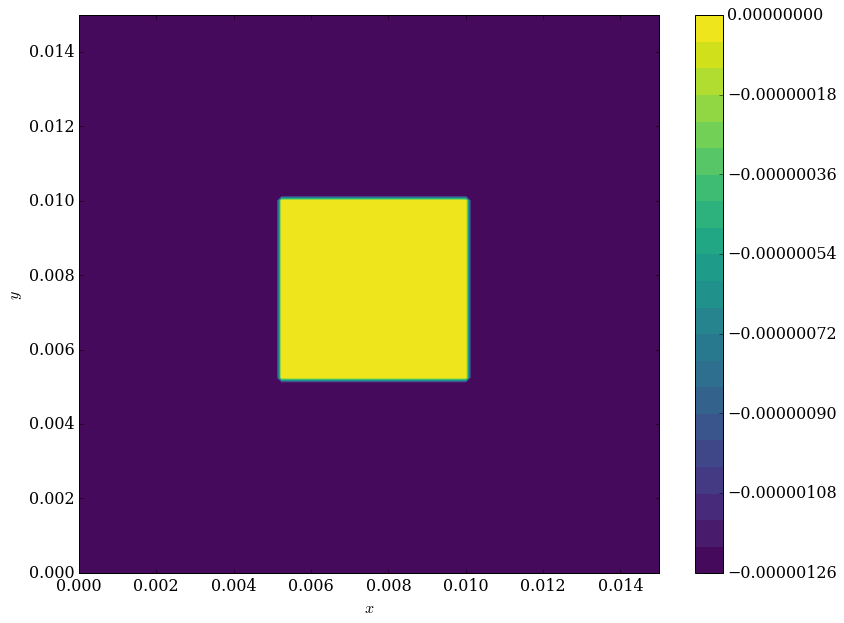

In [25]:
pyplot.figure(figsize=(13,10))
pyplot.contourf(x,y,T,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Ensuite nous avons animer notre diffusion. Pour ce faire, l'un de nos camarades à trouver un lien très utile :
https://matplotlib.org/examples/animation/dynamic_image2.html

On l'a donc modifié de manière à ce qu'il rende compte de notre diffusion.

N.B : les couleurs ne sont pas les mêmes que le graphique car le code "couleur" utilisé n'est pas le même mais cela ne change rien au fait que le centre reste avec un champ magnétique constant égal à 0


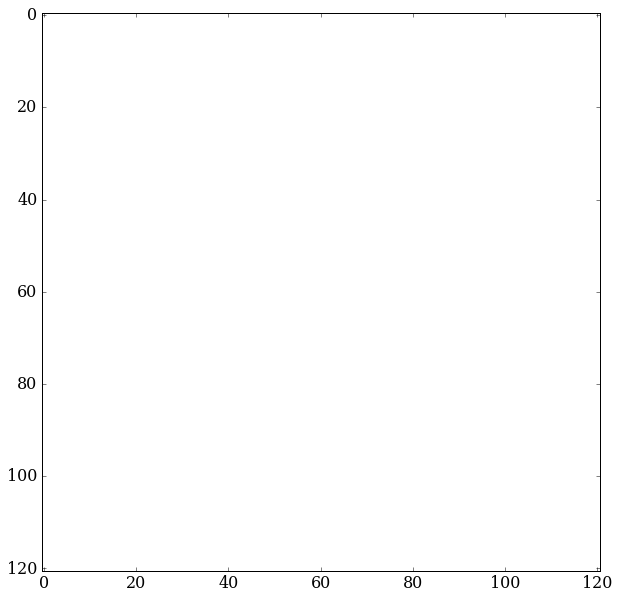

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(13,10))


ims = []
t=0
for i in range(50):
    Ti = numpy.ones((ny, nx))*0
    im = plt.imshow(fctlap(Ti,t,alpha,sigma,mu0,dt,dx,dy), animated=True)
    ims.append([im])
    t=t+80
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=3000)

# ani.save('dynamic_images.mp4')

plt.show()

In [27]:
from IPython.display import HTML
HTML(ani.to_html5_video())

Vu qu'on a discrétiser notre plan conducteur, on peut trouver $\bf B$ en un point donné à un temps donné en lui demandant de nous sortir la valeur en ce point

In [11]:
nt=int((1.25e-3)/(2.5e-7))              #t=1.25 * 10⁻3 secondes
T=fctlap(Ti,nt,alpha,sigma,mu0,dt,dx,dy)
x=int((2.5e-1)/(1.5/120))          #x et y sont a l'emplacement 2.5 * 10⁻3 m = 2.5 * 10⁻1 cm
y=int((2.5e-1)/(1.5/120))
T[x,y]                      #champ magnétique au point (x,y)

-1.244802029386867e-06

Cette valeur semble cohérente avec le fait que le champ magnétique sera négatif après la diffusion suite aux conditions aux bords du conducteur. De plus comme la diffusion se fait assez rapidement et que la valeur de $\bf B$ est proche de $\mu$,cette valeur est plausible  

On sait que l'équation (2) nous donne la relation entre $\bf B$ et $\bf J$.

Comme on a discrétisé $\bf B$, on a en quelques sortes les dérivées partielles de $\vec{\bf B}$ dans notre grille. Dès lors, il suffit d'isoler $\bf J$ dans l'équation (2) pour avoir sa valeur 

In [12]:
a=-1/mu0
T[x,y]*a             #a coefficient a mettre pour avoir J

0.98793811856100555

la valeur de $\bf J$ s'approche de 1 qui est la valeur de $\bf J$ aux bords du conducteur. Ceci est cohérent avec le fait que après la diffusion, le champ magnétique sera le même dans tout le conducteur. Comme c'est cette densité de courant $\bf J$ qui crée le champ magnétique, il est logique que sa valeur dans tout le conducteur s'approche de 1.

Il nous reste donc à calculer le flux de $\bf B$ à travers notre surface conductrice.

Par définition, on sait que : 
$$ \Phi = \int \!\!\! \int_S \vec{\bf B} \cdot \vec{\bf dS} $$
Or comme on a discrétisé notre surface, on peut approximer l'intégrale double pour une somme de $\vec{\bf B}$ en tout point du conducteur et mutliplier ce $\bf B$ total par la surface pour obtenir notre flux.

N.B : On choisit l'orientation de $\vec{\bf dS}$ comme étant la même que $\vec{\bf B}$ pour avoir un flux positif

In [13]:
def fluxlap(Ti,nt,alpha,sigma,mu0,dt,dx,dy):
    
    for n in range(nt):
        Tn=T.copy()
        #partie inférieure
        T[1:-1,1:41]=Tn[1:-1,1:41]+alpha*\
            (dt/dy**2 * (Tn[2:,1:41] - 2*Tn[1:-1,1:41] + Tn[:-2,1:41]) +\
             dt/dx**2 * (Tn[1:-1,2:42] - 2*Tn[1:-1,1:41] + Tn[1:-1,:40]))
            
        #partie supérieure    
        T[1:-1,81:-1]=Tn[1:-1,81:-1]+alpha*\
            (dt/dy**2 * (Tn[2:,81:-1] - 2*Tn[1:-1,81:-1] + Tn[:-2,81:-1]) +\
             dt/dx**2 * (Tn[1:-1,82:] - 2*Tn[1:-1,81:-1] + Tn[1:-1,80:-2]))
            
        #partie centrale droite
        T[1:41,41:81]=Tn[1:41,41:81]+alpha*\
            (dt/dy**2 * (Tn[2:42,41:81] - 2*Tn[1:41,41:81] + Tn[:40,41:81]) +\
             dt/dx**2 * (Tn[1:41,42:82] - 2*Tn[1:41,41:81] + Tn[1:41,40:80]))
        
        #partie centrale gauche
        T[81:-1,41:81]=Tn[81:-1,41:81]+alpha*\
            (dt/dy**2 * (Tn[82:,41:81] - 2*Tn[81:-1,41:81] + Tn[80:-2,41:81]) +\
             dt/dx**2 * (Tn[81:-1,42:82] - 2*Tn[81:-1,41:81] + Tn[81:-1,40:80]))
        
        
        T[42:80,42:80]=0                             #champ B dans le supra est nul
        
        #conditions aux bords:
        #neuman:
        T[41,41:81]=-mu0*dy+T[40,41:81]
        T[81,41:81]=mu0*dy+T[82,41:81]
        T[41:81,41]=-dx*mu0+T[41:81,40]
        T[41:81,81]=-dx*mu0+T[41:81,82]
        
        
        #Dirichlet:
        T[:,0]=mu0
        T[:,-1]=mu0
        T[0,:]=mu0
        T[-1,:]=mu0
    
    j=0
    i=0
    B=0
    while j<=120:
        while i<=120:
            B=T[i,j]              #additions de toutes les valeurs dans T = B
            i=i+1
        j=j+1
        
    flux=B*(0.015*0.015)
    return flux

In [14]:
Ti = numpy.ones((ny, nx))*0
nt=int((1.25e-2)/(2.5e-7))
flux=fluxlap(Ti,nt,alpha,sigma,mu0,dt,dx,dy)
flux                       #flux de B a travers la surface du cylindre en T/m²

2.835e-10

Pour discuter de la vraisemblance de la valeur du flux, on peut calculer le flux au travers de la surface lorsque la diffusion de $\bf B$ aura atteint un état stationnaire càd quand $\bf B$ sera égale à $ \mu$ dans tout le conducteur

In [18]:
x = mu0*(0.015*0.015)
print (x)

2.835e-10


Comme nos valeurs sont égales, on en déduit que l'état stationnaire de diffusion est atteint après $1.25 \cdot 10^{-2}$

Donc la valeur de notre flux est cohérente.

Il nous reste donc à justifier pourquoi on a pris un pas de temps comme $dt=2.5\cdot 10^{-7}s$.
Pour ce faire, nous allons étudier la "stabilité" du code avec un tel $dt$

In [21]:
dt = 2.5e-7

#on implémente de quoi crée nos dx et dy
L = 1.5e-2
H = 1.5e-2
nx = 121
ny = 121
dx = L/(nx-1)
dy = H/(ny-1)

#on utilise le code pour la stabilité contenu dans la rubrique 4.3 du mooc. Comme nos dx et dy sont égaux, on a :

Stab = alpha*(dt/dx**2)
if Stab < 1/4 :
    print('Ok')

Ok


Donc notre code est bien stable avec un tel $dt$.
De plus, intuitivement, on a un courant surface de $1A/m^2$ qui parcourt les bords d'une surface assez petite. On doit donc s'attendre à avoir rapidement un état stationnaire de la diffusion de $\bf B$. Quand on calcule B et le flux précédemment, on voit que l'état stationnaire est atteint entre $10^{-3}$ et $10^{-2}$ $s$. Ces temps étant très petits, il nous faut un $dt$ encore plus petit pour voir le phénomène de diffusion d'où prendre un tel $dt$